## Install and import missing libraries


In [1]:
#USE FOR GOOGLE COLAB
# pip install googletrans==4.0.0-rc1

In [2]:
#USE FOR GOOGLE COLAB
# pip install langdetect

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from googletrans import Translator
from langdetect import detect
from sklearn.model_selection import train_test_split
import tensorflow as tf
from wordcloud import WordCloud
import re
from bs4 import BeautifulSoup
import spacy
from spacy.lang.lt.examples import sentences
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

In [4]:
pd.set_option("display.max_colwidth", 255)

In [5]:
from IPython.display import display, HTML

display(HTML("<style>.container { width:70% !important; }</style>"))

In [6]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [7]:
# USE FOR GOOGLE COLAB
# from google.colab import drive
# drive.mount('/content/drive/')

<IPython.core.display.Javascript object>

In [8]:
# USE FOR GOOGLE COLAB
# nltk.download('punkt')

<IPython.core.display.Javascript object>

## Data investigation

In [9]:
# USE FOR GOOGLE COLAB
# uploading data
# df_1 = pd.read_csv("/content/drive/My Drive/data/KAM_tema_3000_1.csv", index_col=0, encoding='utf-8')
# df_2 = pd.read_csv("/content/drive/My Drive/data/KAM_tema_3000_2.csv", index_col=0, encoding='utf-8')
# df_3 = pd.read_csv("/content/drive/My Drive/data/KAM_tema_3000_3.csv", index_col=0,encoding='utf-8')
# df_4 = pd.read_csv("/content/drive/My Drive/data/KAM_tema_3000_4.csv", index_col=0,encoding='utf-8')
# df_5 = pd.read_csv("/content/drive/My Drive/data/KAM_tema_3000_5.csv", index_col=0,encoding='utf-8')
# df_6 = pd.read_csv("/content/drive/My Drive/data/KAM_tema_3000_6.csv", index_col=0,encoding='utf-8')
# df_7 = pd.read_csv("/content/drive/My Drive/data/KAM_tema_3000_7.csv", index_col=0,encoding='utf-8')

<IPython.core.display.Javascript object>

In [10]:
# uploading data
df_1 = pd.read_csv("data/KAM_tema_3000_1.csv", index_col=0)
df_2 = pd.read_csv("data/KAM_tema_3000_2.csv", index_col=0)
df_3 = pd.read_csv("data/KAM_tema_3000_3.csv", index_col=0)
df_4 = pd.read_csv("data/KAM_tema_3000_4.csv", index_col=0)
df_5 = pd.read_csv("data/KAM_tema_3000_5.csv", index_col=0)
df_6 = pd.read_csv("data/KAM_tema_3000_6.csv", index_col=0)
df_7 = pd.read_csv("data/KAM_tema_3000_7.csv", index_col=0)

<IPython.core.display.Javascript object>

In [11]:
df_1.sample(1)

keyword_id                                     keyword_name  \
article_id                                                                
39908000        337488  KAM tema: Kariuomenės stiprinimas, pratybos [i]   

                                                                                      article_title  \
article_id                                                                                            
39908000    Dėl naikintuvo skrydžio nutraukta prezidento ir Ispanijos premjero spaudos konferencija   

                                                                                                                                                                                                                                                              article_body  \
article_id                                                                                                                                                                                                                                                                   
39908000    Lietuvos karinių oro pajėgų Šiaulių aviacijos bazėje ketvirtadienį vykusi prezidento Gitano Nausėdos ir Ispanijos premjero Pedro Sanchezo spaudos konferencija buvo nutraukta, kadangi reikėjo pakelti vieną iš oro policijos misiją atliekančių naikintuvų...   

                    pubdatetime  
article_id                       
39908000    2021-07-08 12:46:00

<IPython.core.display.Javascript object>

In [12]:
df_2.sample(1)

keyword_id                           keyword_name  \
article_id                                                      
46199935        337489  KAM tema: Įsigijimai ir biudžetas [i]   

                                                                 article_title  \
article_id                                                                       
46199935    Anušauskas Pabradėje pristatys kovos mašinų „Vilkas“ projekto eigą   

                                                                                                                                                                                                                                                              article_body  \
article_id                                                                                                                                                                                                                                                                   
46199935    Krašto apsaugos ministras Arvydas Anušauskas Pabradėje, Generolo Silvestro Žukausko poligone, antradienį pristatys pėstininkų kovos mašinų „Vilkas“ projekto įgyvendinimo eigą.<br /> Šiuo metu į Lietuvą jau atgabenta maždaug pusė iš 88 užsakytų šarvuoč...   

                    pubdatetime  
article_id                       
46199935    2022-09-06 06:10:00

<IPython.core.display.Javascript object>

In [13]:
df_3.sample(1)

keyword_id                               keyword_name  \
article_id                                                          
49201236        337490  KAM tema: Saugumo ir gynybos politika [i]   

                                                                      article_title  \
article_id                                                                            
49201236    F.Coury:,,Prancūzijoje vyravo požiūris, jog turime draugauti su Rusija“   

                                                                                                                                                                                                                                                              article_body  \
article_id                                                                                                                                                                                                                                                                   
49201236    Prancūzų savanoris, atvykęs į Ukrainą karo pradžioje, parašęs knygą apie tai, o dabar vėl sugrįžęs į kariaujančią šalį, Florent'as Coury su IQ biuro Briuselyje vadovu Evaldu Labanausku aiškinosi, kodėl Prancūzijoje vyrauja tokios prorusiškos nuotaikos...   

                    pubdatetime  
article_id                       
49201236    2023-03-01 00:00:00

<IPython.core.display.Javascript object>

In [14]:
df_4.sample(1)

keyword_id                         keyword_name  \
article_id                                                    
45341660        337491  KAM tema: Kibernetinis saugumas [i]   

                                                                                             article_title  \
article_id                                                                                                   
45341660    Po „Švaros brolių“ duomenų nutekėjimo – specialistų įspėjimas: Lietuvai kilo neeilinis pavojus   

                                                                                                                                                                                                                                                              article_body  \
article_id                                                                                                                                                                                                                                                                   
45341660    Informacinio karo amžiuje asmens duomenys gali tapti esminiu ginklu. Specialistai pastebi, kad prasidėjus karui Ukrainoje į Lietuvą skrieja vis daugiau programišių strėlių. Nutekėję „Švaros brolių“ klientų duomenys verčia sunerimti. Netekę svarbių duo...   

                    pubdatetime  
article_id                       
45341660    2022-07-06 19:15:00

<IPython.core.display.Javascript object>

In [15]:
df_5.sample(1)

keyword_id                                           keyword_name  \
article_id                                                                      
48161373        337492  KAM tema: Pilietiškumas ir atsparumas propagandai [i]   

                                           article_title  \
article_id                                                 
48161373    Pirmą kartą paminėjo Lietuvos vėliavos dieną   

                                                                                                                                                                                                                                                              article_body  \
article_id                                                                                                                                                                                                                                                                   
48161373    ? Lietuvos šaulių sąjungos Vakarų (Jūros) šaulių 3-iosios rinktinės 305 kuopos šaulių iniciatyva, sausio 1-ąją pirmą kartą Kretingoje, Rotušės aikštėje prie Nepriklausomybės paminklo, iškilmingai paminėta Lietuvos vėliavos diena.<br /> Atskleidžia ver...   

                    pubdatetime  
article_id                       
48161373    2023-01-03 00:00:00

<IPython.core.display.Javascript object>

In [16]:
df_6.sample(1)

keyword_id                                    keyword_name  \
article_id                                                               
47826559        337493  KAM tema: Incidentai, nelaimės, kriminalai [i]   

           article_title  \
article_id                 
47826559       Skandalas   

                                                                                                                                                                                                                                                              article_body  \
article_id                                                                                                                                                                                                                                                                   
47826559    <p>Skandalas: viešojoje erdvėje pasklido informacija, kad trys merginos prabilo apie prieš kelerius metus, kai joms buvo 16 m., patirtą galimai seksualinį priekabiavimą ir santykius - strėlės nukreiptos į Lietuvos skautų sąjungos narį, dabartinį Lietu...   

                    pubdatetime  
article_id                       
47826559    2022-12-13 00:00:00

<IPython.core.display.Javascript object>

In [17]:
df_7.sample(1)

keyword_id  \
article_id               
41575406        484549   

                                                                               keyword_name  \
article_id                                                                                    
41575406    KAM tema: Kariuomenės pagalba kitoms valstybės institucijoms ir gyventojams [i]   

                                                                                    article_title  \
article_id                                                                                          
41575406    4000 karių, padėjusių stabdyti nelegalios migracijos antplūdį pasienyje – KAM išmokos   

                                                                                                                                                                                                                                                              article_body  \
article_id                                                                                                                                                                                                                                                                   
41575406    Nelegalios migracijos antplūdį suvaldyti padėję daugiau kaip 4000 karių bus paskatinti išmokomis. Jas Krašto apsaugos ministerija skirs visiems nuo liepos mėnesio Valstybės sienos apsaugos tarnybos pareigūnams pasienyje talkinusiems kariams, rašoma mi...   

                    pubdatetime  
article_id                       
41575406    2021-10-28 13:10:45

<IPython.core.display.Javascript object>

In [18]:
# Putting all the data into one dataframe and then do a copy
full_df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7]).reset_index()

<IPython.core.display.Javascript object>

In [19]:
full_df_copy = full_df

<IPython.core.display.Javascript object>

In [20]:
full_df_copy.sample(5)

article_id  keyword_id  \
4392     37850486      337489   
14717    43630635      337492   
661      47165716      337488   
10489    36284972      337491   
13437    45788307      337492   

                                                keyword_name  \
4392                   KAM tema: Įsigijimai ir biudžetas [i]   
14717  KAM tema: Pilietiškumas ir atsparumas propagandai [i]   
661          KAM tema: Kariuomenės stiprinimas, pratybos [i]   
10489                    KAM tema: Kibernetinis saugumas [i]   
13437  KAM tema: Pilietiškumas ir atsparumas propagandai [i]   

                                                                                                                          article_title  \
4392                                                                                                 Kariuomenei perdavė 15 sunkvežimių   
14717                                                                                                    Prašo paramos Ukrainos kariams   
661                                   Santara. Audycja w języku polskim. Polsko-litewska współpraca wojskowa jest przykładem dla innych   
10489  „KoronaStopLT“ programėlę parsisiuntė daugiau nei 57 tūkst. lietuvių, sekmadienį sutrikimai galėjo kilti dėl kibernetinės atakos   
13437                                                                                                Jubiliejų pasitinka dviem knygomis   

                                                                                                                                                                                                                                                         article_body  \
4392   Toliau modernizuojant ir atnaujinant Lietuvos kariuomenės pajėgumus, Lietuvos kariuomenei perduota 15 Vokietijos gamintojo „Daimler AG" specialiosios paskirties AROCS sunkvežimių platformoms ir konteineriams vežti su komplektuojamomis dalimis.<br />Kr...   
14717  Grupė Lietuvos kariuomenės kūrėjų savanorių vykdo paramos tiekimą tiesiogiai kovojantiems Ukrainos kariams, tarp kurių yra ir 1991-aisiais Lietuvos Aukščiausiąją Tarybą gynusių ukrainiečių. Redakciją pasiekė Lietuvos kariuomenės kūrėjas savanorio Anta...   
661    Przebywający na Litwie szef Sztabu Generalnego Wojska Polskiego generał Rajmund Tomasz Andrzejczak omówił kwestie współpracy wojskowej z dowódcą Sił Zbrojnych Litwy generałem porucznikiem Valdemarasem Rupšysem. Dowódcy armii litewskiej i polskiej uzgo...   
10489  Penktadienį pristatyta mobiliesiems telefonams skirta programėlė „KoronaStopLT“, padedanti atsekti galimus rizikingus kontaktus su užsikrėtusiaisiais COVID-19. Sveikatos apsaugos ministro teigimu, šia programėle jau pasinaudojo 57 tūkst. šalies gyvent...   
13437  Ateinančią savaitę Žiemgalos krašto poetas, fotografas Jonas Ivanauskas pasitinka 70 metų jubilieji nę su kaktį. Metai - „derlingi“, kūrėjas išleido dvi knygas - vieną poezijos, kitą - kraštotyrinės medžiagos, prisiminimų bei proginių eilių ciklo rink...   

               pubdatetime  
4392   2021-02-24 00:00:00  
14717  2022-03-14 12:11:00  
661    2022-11-04 14:30:00  
10489  2020-11-09 15:07:00  
13437  2022-08-06 00:00:00

<IPython.core.display.Javascript object>

In [21]:
full_df_copy["keyword_name"] = (
    full_df_copy["keyword_name"].str.replace("KAM tema:", "").str.replace("\[i\]", "")
)

C:\Users\Dovilė\AppData\Local\Temp\ipykernel_23484\1724268505.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  full_df_copy["keyword_name"].str.replace("KAM tema:", "").str.replace("\[i\]", "")


<IPython.core.display.Javascript object>

In [22]:
full_df_copy["keyword_name"].value_counts()

 Kariuomenės stiprinimas, pratybos                                     3000
 Įsigijimai ir biudžetas                                               3000
 Saugumo ir gynybos politika                                           3000
 Kibernetinis saugumas                                                 3000
 Pilietiškumas ir atsparumas propagandai                               3000
 Incidentai, nelaimės, kriminalai                                      3000
 Kariuomenės pagalba kitoms valstybės institucijoms ir gyventojams     1413
Name: keyword_name, dtype: int64

<IPython.core.display.Javascript object>

In [23]:
category = (
    full_df_copy[["keyword_name", "keyword_id"]]
    .drop_duplicates()
    .sort_values("keyword_id")
)
category

keyword_name  \
0                                       Kariuomenės stiprinimas, pratybos    
3000                                              Įsigijimai ir biudžetas    
6000                                          Saugumo ir gynybos politika    
9000                                                Kibernetinis saugumas    
12000                             Pilietiškumas ir atsparumas propagandai    
15000                                    Incidentai, nelaimės, kriminalai    
18000   Kariuomenės pagalba kitoms valstybės institucijoms ir gyventojams    

       keyword_id  
0          337488  
3000       337489  
6000       337490  
9000       337491  
12000      337492  
15000      337493  
18000      484549

<IPython.core.display.Javascript object>

In [24]:
# Define the custom colors
colors = ["#F5F2B8", "#F9DAD0", "#C5DCA0", "#B279A7", "#7E7F9A", "#6665DD",  "#7CA5B8"]


<IPython.core.display.Javascript object>

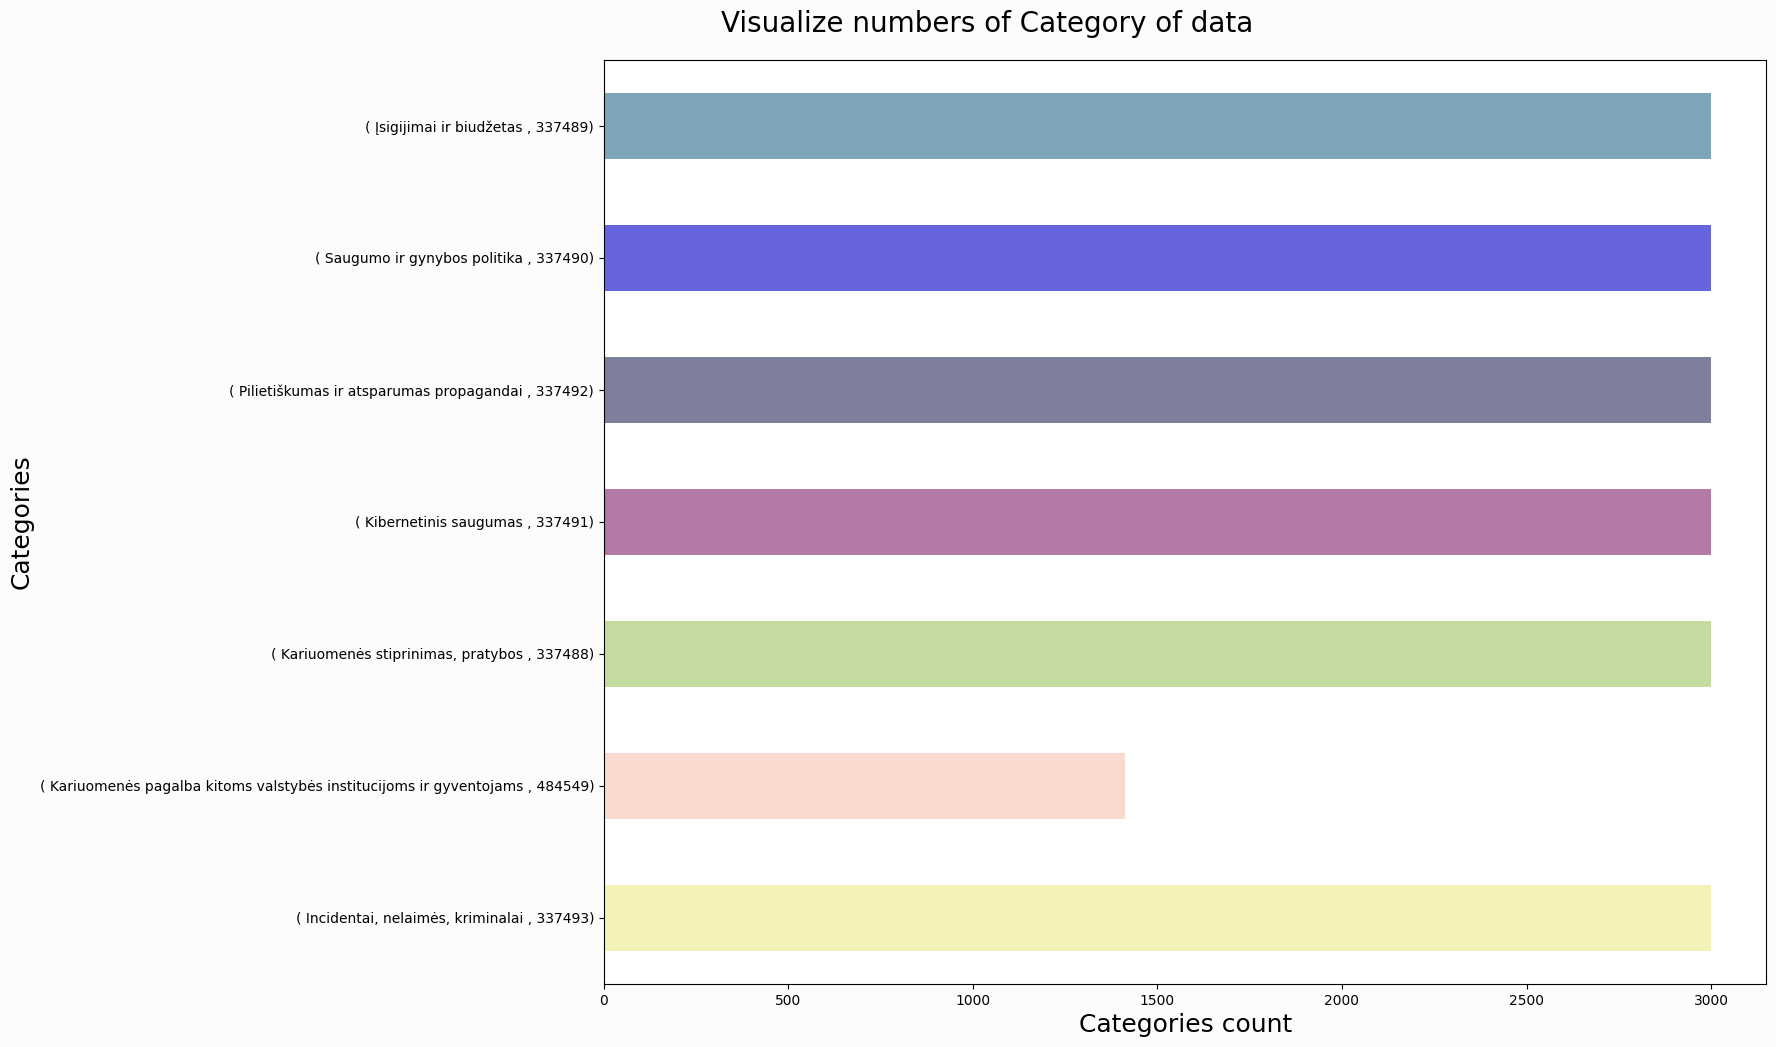

<IPython.core.display.Javascript object>

In [25]:
plt.figure(figsize=(15, 12), facecolor=(0.99, 0.99, 0.99))
full_df_copy.groupby("keyword_name").keyword_id.value_counts().plot(
    kind="barh", color=colors
)
plt.xlabel("Categories count", fontsize=18)
plt.ylabel("Categories", fontsize=18)
plt.title("Visualize numbers of Category of data", pad=20, fontsize=20).set_position(
    [0.33, 1]
)
plt.savefig("Not_cleaned_data.png", facecolor=(0.99, 0.99, 0.99))
plt.show()

## Cleaning and normalising data

In [26]:
# lowecase the text for better accuracy
full_df_copy["article_title"] = full_df_copy["article_title"].str.lower()
full_df_copy["article_body"] = full_df_copy["article_body"].str.lower()

<IPython.core.display.Javascript object>

In [27]:
# Remove html, link and file elements from given text
def remove_html_tags(text):
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"\b\w+\.(?:jpg|jpeg|png|gif)\b", "", text)
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()


# Apply the remove html, link, file elements to the article_title and article_body columns
full_df_copy["article_body"] = full_df_copy["article_body"].apply(
    lambda x: remove_html_tags(x)
)
full_df_copy["article_title"] = full_df_copy["article_title"].apply(
    lambda x: remove_html_tags(x)
)

C:\Users\Dovilė\AppData\Local\Programs\Python\Python310\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


<IPython.core.display.Javascript object>

In [28]:
# Remove special characters from text
def special_char(text):
    reviews = ""
    for x in text:
        if x.isalnum():
            reviews = reviews + x
        else:
            reviews = reviews + " "
    return reviews


# Apply the special remove to the article_body columns
full_df_copy["article_body"] = full_df_copy["article_body"].apply(special_char)

<IPython.core.display.Javascript object>

In [29]:
# Strip the 'article_body' to a maximum length of 10,000 characters
full_df_copy["article_body"] = full_df_copy["article_body"].str.slice(stop=10000)

<IPython.core.display.Javascript object>

In [30]:
# Simple language detect in text
def detect_lang(text):
    try:
        return detect(text)
    except:
        return "unknown"
    
# Apply the language detection to the article_title and article_body columns   
full_df_copy["title_lang"] = full_df_copy["article_title"].apply(detect_lang)
full_df_copy["body_lang"] = full_df_copy["article_body"].str.slice(stop=255).apply(detect_lang)


<IPython.core.display.Javascript object>

In [31]:
#  Cheking unique language values to see what languages were detected in title
full_df_copy["title_lang"].unique()

array(['lt', 'sv', 'pl', 'lv', 'id', 'sl', 'de', 'af', 'it', 'en', 'ru',
       'cy', 'no', 'tl', 'fi', 'so', 'pt', 'et', 'mk', 'hr', 'sq', 'fr',
       'tr', 'sw', 'uk', 'sk', 'ca', 'es', 'nl', 'cs'], dtype=object)

<IPython.core.display.Javascript object>

In [32]:
#  Cheking unique language values to see what languages were detected in body
full_df_copy["body_lang"].unique()

array(['lt', 'pl', 'unknown', 'en', 'ru', 'uk', 'es'], dtype=object)

<IPython.core.display.Javascript object>

In [33]:
# Personally, I know that certain detected languages are not in the data, so I check each one individually to know whether to keep it or not
full_df_copy[full_df_copy["title_lang"] == "pt"]

article_id  keyword_id  \
1704     44284853      337488   
4360     38602305      337489   
9603     43950328      337491   
14253    44284853      337492   
17351    23485878      337493   
17457    23182902      337493   
18311    43701772      484549   
18423    42259869      484549   

                                                              keyword_name  \
1704                                    Kariuomenės stiprinimas, pratybos    
4360                                              Įsigijimai ir biudžetas    
9603                                                Kibernetinis saugumas    
14253                             Pilietiškumas ir atsparumas propagandai    
17351                                    Incidentai, nelaimės, kriminalai    
17457                                    Incidentai, nelaimės, kriminalai    
18311   Kariuomenės pagalba kitoms valstybės institucijoms ir gyventojams    
18423   Kariuomenės pagalba kitoms valstybės institucijoms ir gyventojams    

                       article_title  \
1704            2:0 emanuelio naudai   
4360                        dosnumas   
9603                nesuranda vadovo   
14253           2:0 emanuelio naudai   
17351          gabeno donoro organus   
17457  po incidento - nauju maršrutu   
18311          didina maisto rezervą   
18423                        donoras   

                                                                                                                                                                                                                                                         article_body  \
1704   2017 m  užsitikrinęs prancūzijos prezidento postą  šiais metais emanuelis makronas vėl triumfavo kovoje prieš marine le pen  europa gi vieningai atsiduso   ekstremistinių idėjų vedina konkurentė dar penkerius metus nepasieks šalies valdymo vairo proru...   
4360                                                                                                                                    dosnumas  jav dovanoja lietuvos kariuomenei prieštankinių granatsvaidžių m72law  paramos vertė  10 mln  dolerių kam lt nuotr    
9603   vakar ketverių metų kadenciją baigė dabartinis nacionalinio kibernetinio saugumo centro  nksc  vadovas r rainys  tačiau krašto apsaugos ministerijai nuo praėjusio rudens nepavyksta rasti jį galinčio pakeisti specialisto  artimiausiu metu planuojama tr...   
14253  2017 m  užsitikrinęs prancūzijos prezidento postą  šiais metais emanuelis makronas vėl triumfavo kovoje prieš marine le pen  europa gi vieningai atsiduso   ekstremistinių idėjų vedina konkurentė dar penkerius metus nepasieks šalies valdymo vairo proru...   
17351                                                                                                                naktį į sekmadienį karinių oro pajėgų sraigtasparnis mi 8  budintis kaune  buvo pasitelktas pargabenti donoro organus iš rygos į kauno klinikas    
17457  praeitą savaitę pakeliui į klaipėdą incidentą patyręs keltas  regina seaways  išplaukė nauju maršrutu   jau nebe į kylį vokietijoje  kaip iki tol  bet į karlshamną švedijoje  nors veikia tik vienas laivo variklis  kompanijos atstovų tvirtinimu  tai nė...   
18311  seimas pritarė žemės ūkio ministerijos  žūm  siūlymui keisti valstybės maisto produktų rezervo tvarką  kad ji atitiktų šių dienų poreikius  iki šiol valstybės rezervui žemės ūkio produktai bei maisto prekės valstybės lėšomis perkami viešųjų pirkimų įs...   
18423                                                      donoras  vakar lietuvos kariuomenės karinių oro pajėgų sraigtasparnis pakilo iš kauno  kad nuskraidintų medikų komandą ir donorinius organus iš latvijos valmieros ligoninės į santaros klinikas vilniuje    

               pubdatetime title_lang body_lang  
1704   2022-04-28 00:00:00         pt        lt  
4360   2021-04-14 00:00:00         pt        lt  
9603   2022-04-05 00:00:00         pt        lt  
14253  2022-04-28 00:00:00         pt        lt  
17351  20

<IPython.core.display.Javascript object>

In [34]:
full_df_copy[(full_df_copy["title_lang"] == "lt") & (full_df_copy["body_lang"] == "en")]

article_id  keyword_id                   keyword_name  \
7907     48717088      337490   Saugumo ir gynybos politika    
11953    22705718      337491         Kibernetinis saugumas    

                                                                                                     article_title  \
7907                                         ukrainai dronus tiekusios jav įmonės gamykloje latvijoje kilo gaisras   
11953  kibernetinio saugumo konferencija security day'18: „jūsų duomenys el. erdvėje - kas juos apsaugos ir kaip?“   

                                                                                                                                                                                                                                                         article_body  \
7907   gaisras latvijoje  afp  scanpix  nuotr  firefighters extinguish a fire at a drone factory run by us firm edge autonomy in marupe on the outskirts of latvia s capital riga on february 7  2023    a fire broke out on february 7 at a us drone factory in l...   
11953                        09 30 10 20 key note adress by gregory f  treverton cyber threats and cyber defenses  a strategic view10 25 11 50 panel discussion  eprivacy  who will win  12 50 14 05 panel discussion  how lithuania is prepared to ensure eprivacy     

               pubdatetime title_lang body_lang  
7907   2023-02-07 21:06:00         lt        en  
11953  2018-09-12 18:00:00         lt        en

<IPython.core.display.Javascript object>

In [35]:
full_df_copy[(full_df_copy["title_lang"] == "tr") & (full_df_copy["body_lang"] == "lt")]

article_id  keyword_id                        keyword_name  \
5228     23318712      337489            Įsigijimai ir biudžetas    
11779    23318712      337491              Kibernetinis saugumas    
17395    23318712      337493   Incidentai, nelaimės, kriminalai    

      article_title  \
5228     buldozeris   
11779    buldozeris   
17395    buldozeris   

                                                                                                                                                                                                                                                         article_body  \
5228   po kelių iš eilės nesėkmių  valstiečiams  pavyko prastumti įstatymo pataisas  kuriomis valstybės dotacija bus palepinti jų koalicijos partneriai  socialdarbiečiai   numatytas ir dotacijos šaltinislėšų bus skolinamas  kartu su lėšomis  reikalingomis kr...   
11779  po kelių iš eilės nesėkmių  valstiečiams  pavyko prastumti įstatymo pataisas  kuriomis valstybės dotacija bus palepinti jų koalicijos partneriai  socialdarbiečiai   numatytas ir dotacijos šaltinislėšų bus skolinamas  kartu su lėšomis  reikalingomis kr...   
17395  po kelių iš eilės nesėkmių  valstiečiams  pavyko prastumti įstatymo pataisas  kuriomis valstybės dotacija bus palepinti jų koalicijos partneriai  socialdarbiečiai   numatytas ir dotacijos šaltinislėšų bus skolinamas  kartu su lėšomis  reikalingomis kr...   

               pubdatetime title_lang body_lang  
5228   2018-10-19 00:00:00         tr        lt  
11779  2018-10-19 00:00:00         tr        lt  
17395  2018-10-19 00:00:00         tr        lt

<IPython.core.display.Javascript object>

In [36]:
# removing 'ru', 'et', 'uk', 'pl', and 'en'
# leaving 'sl', 'lv', 'de', 'af', 'cy', 'fi','tl', 'id', 'et', 'pt', 'ca', 'ro', 'sv', 'sw', 'tr', 'unknown', 'hr', 'so', 'da', 'sq', 'hu', 'es', 'sk', 'fr', 'no', 'uk', 'nl','bg', 'mk', 'cs'


def clean_dataframe(df):
    df.drop(df[df["body_lang"] == "ru"].index, inplace=True)
    df.drop(df[df["body_lang"] == "et"].index, inplace=True)
    df.drop(df[df["body_lang"] == "uk"].index, inplace=True)
    df.drop(df[df["body_lang"] == "pl"].index, inplace=True)
    df.drop(df[df["body_lang"] == "en"].index, inplace=True)


clean_dataframe(full_df_copy)

<IPython.core.display.Javascript object>

In [37]:
# Drop the temporary language detection columns
full_df_copy.drop(["title_lang", "body_lang"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [38]:
# Create a function to translate text using googletrans
def translate_text(text, dest_lang):
    translator = Translator()
    translator.raise_Exception = True
    translated = translator.translate(text, dest=dest_lang)

    return translated.text

# Creating temporary dataframe for translation from the missing keyword data
df_subset = full_df_copy[full_df_copy['keyword_id'] == 484549]

# Translate the article_title and article_body columns to English
df_subset['article_title'] = df_subset['article_title'].apply(lambda x: translate_text(x, 'en'))
df_subset['article_body'] = df_subset['article_body'].str.slice(stop=255).apply(lambda x: translate_text(x, 'en'))

# Translate the article_title_en and article_body_en columns back to Lithuanian
df_subset['article_title'] = df_subset['article_title'].apply(lambda x: translate_text(x, 'lt'))
df_subset['article_body'] = df_subset['article_body'].apply(lambda x: translate_text(x, 'lt'))




Exception: Unexpected status code "429" from ('translate.google.com',)

<IPython.core.display.Javascript object>

**googletrans error explained** raise_exception and  429

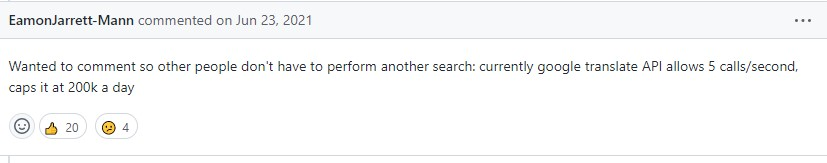

In [39]:
df_subset

article_id  keyword_id  \
18000    49216592      484549   
18001    49218295      484549   
18002    49212719      484549   
18003    49212746      484549   
18004    49154646      484549   
...           ...         ...   
19408    37086593      484549   
19409    37086158      484549   
19410    37099479      484549   
19411    37376517      484549   
19412    37057242      484549   

                                                              keyword_name  \
18000   Kariuomenės pagalba kitoms valstybės institucijoms ir gyventojams    
18001   Kariuomenės pagalba kitoms valstybės institucijoms ir gyventojams    
18002   Kariuomenės pagalba kitoms valstybės institucijoms ir gyventojams    
18003   Kariuomenės pagalba kitoms valstybės institucijoms ir gyventojams    
18004   Kariuomenės pagalba kitoms valstybės institucijoms ir gyventojams    
...                                                                    ...   
19408   Kariuomenės pagalba kitoms valstybės institucijoms ir gyventojams    
19409   Kariuomenės pagalba kitoms valstybės institucijoms ir gyventojams    
19410   Kariuomenės pagalba kitoms valstybės institucijoms ir gyventojams    
19411   Kariuomenės pagalba kitoms valstybės institucijoms ir gyventojams    
19412   Kariuomenės pagalba kitoms valstybės institucijoms ir gyventojams    

                                                                                         article_title  \
18000              naktį prie ligoninės vilniuje leidosi karinis sraigtasparnis: vykdė ypatingą misiją   
18001                      naktį karinis sraigtasparnis į vilnių atskraidino gyvybę gelbstintį krovinį   
18002                   pasitelkus karinių oro pajėgų sraigtasparnį šiąnakt pergabentas donoro organas   
18003                              kariuomenės sraigtasparnis iš kauno į vilnių nugabeno donoro organą   
18004                  karė savanorė jovita juškaitienė: šiandien karinės žinios naudingos ir gyvenime   
...                                                                                                ...   
19408             judėjimo kontrolė: policija stabdys bet kur ir bet kada, už pažeidimus iš karto baus   
19409  kauno policija apibendrino: blokpostuose apgręžta tūkstančiai mašinų, nubausta šimtai pažeidėjų   
19410                                 plaučių transplantacija – išskirtinė ir labai laukiama operacija   
19411                                                                                      stop kadras   
19412                                      išeivijos atstovo dovana - lietuviškos ginkluotės kolekcija   

                                                                                                                                                                                                                                                         article_body  \
18000  ketvirtadienio naktį vilniuje nusileido karinių oro pajėgų sraigtasparnis su donorinėmis kepenimis iš užsienio  kartu grįžo ir vilniaus universiteto ligoninės santaros klinikų pilvo chirurgų komanda  kuri dalyvavo donorinio organo eksplantacijos proce...   
18001  kariuomenė praneša  kad iš nacionalinio transplantacijos biuro buvo gautas pagalbos prašymas pergabenti donoro organą atsižvelgus į prašymą  kovo 9 d   apie 17 val   iš kaune esančio 2 ojo paieškos ir gelbėjimo posto  kartu su medikų komanda pakilo bu...   
18002  kovo 9 d  naktį iš nacionalinio transplantacijos biuro buvo gautas pagalbos prašymas pergabenti donoro organą  rašoma lietuvos kariuomenės pranešime  tai   pirmas kartas šiais metais  kai iš užsienio atgabenami donoriniai organai  skelbia nacionalinis...   
18003  vilnius  kovo 10 d   bns   penktadienį iš kauno į vilnių buvo pergabentas donoro organas  pranešė lietuvos kariuomenė  kariuomenė ketvirtadienį iš nacionalinio transplantacijos biuro gavo prašymą padėti pergabenti donorinį organą  apie 17 val  iš kaun...   
18004  neseniai lietuvos kariuomenės krašto apsaugos savanorių pajėgų  kasp

<IPython.core.display.Javascript object>

In [40]:
# Concat the translated columns  to the original dataframe
full_df_copy = pd.concat([full_df_copy, df_subset]).reset_index()

<IPython.core.display.Javascript object>

In [41]:
# Adding customstopwords
with open("stops_lt.txt", "r", encoding="utf-8") as file:
    stopwords = [word.strip() for word in file.readlines()]

<IPython.core.display.Javascript object>

politics related words:


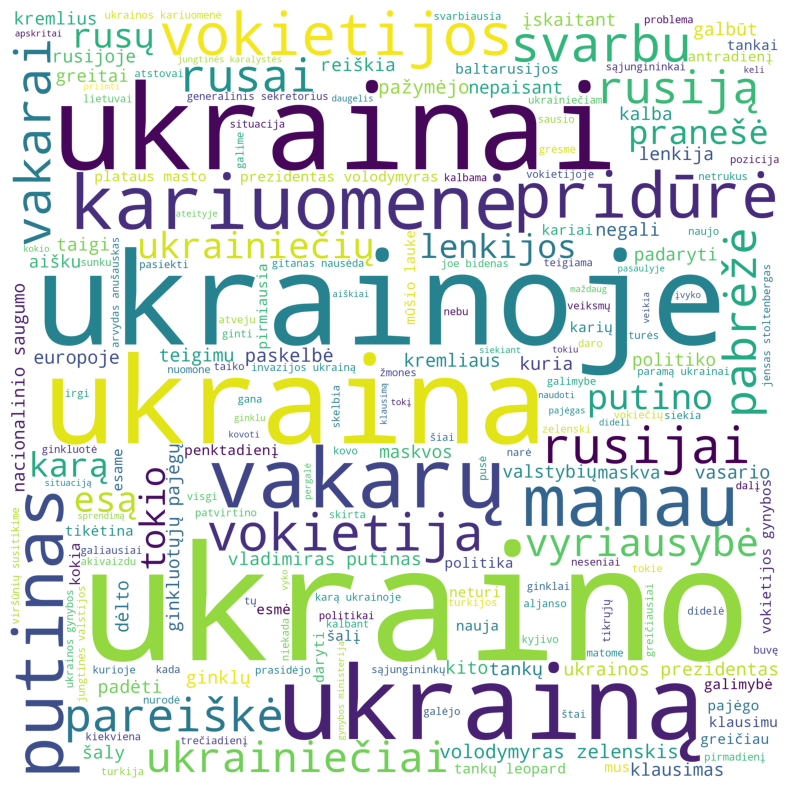

training related words:


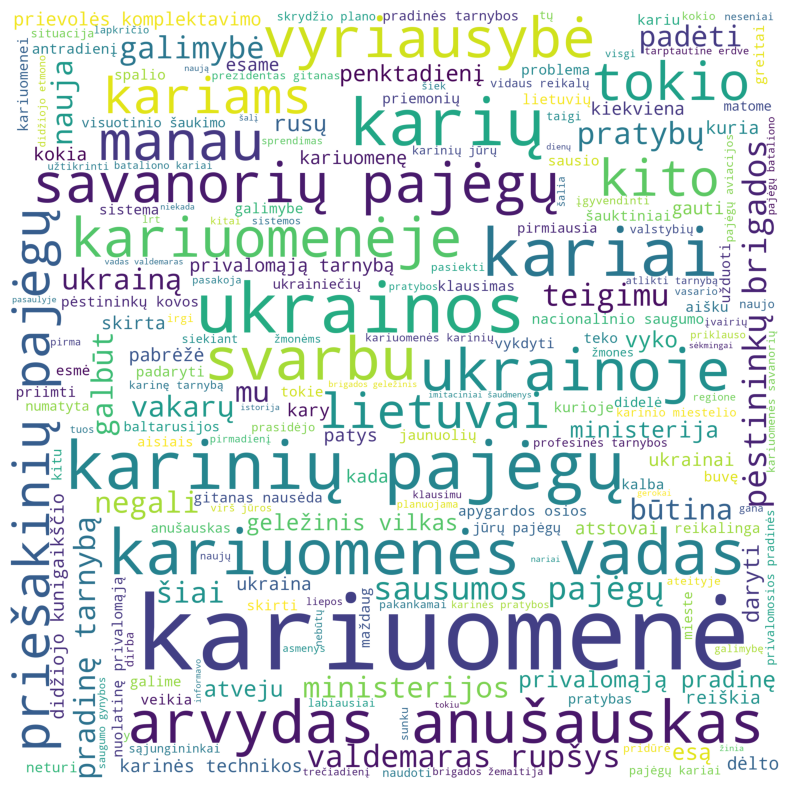

budget related words:


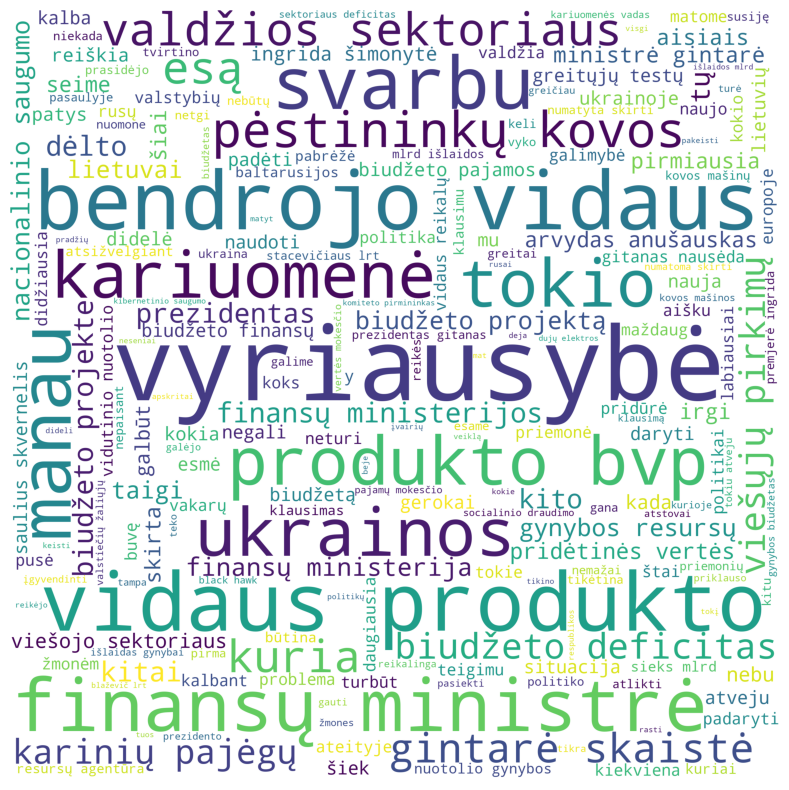

cyber security related words:


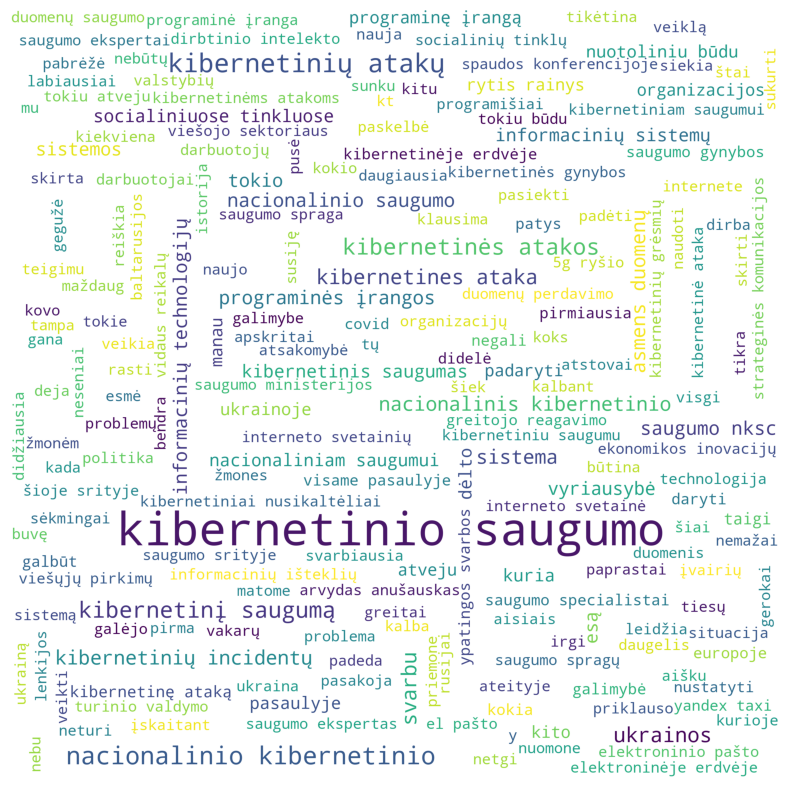

citizenship related words:


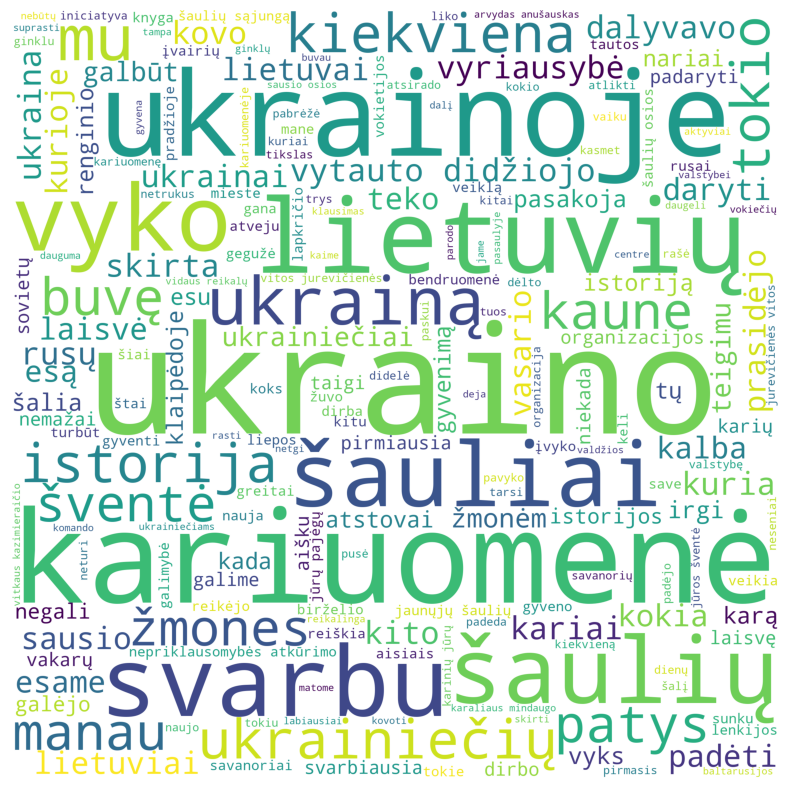

incidents related words:


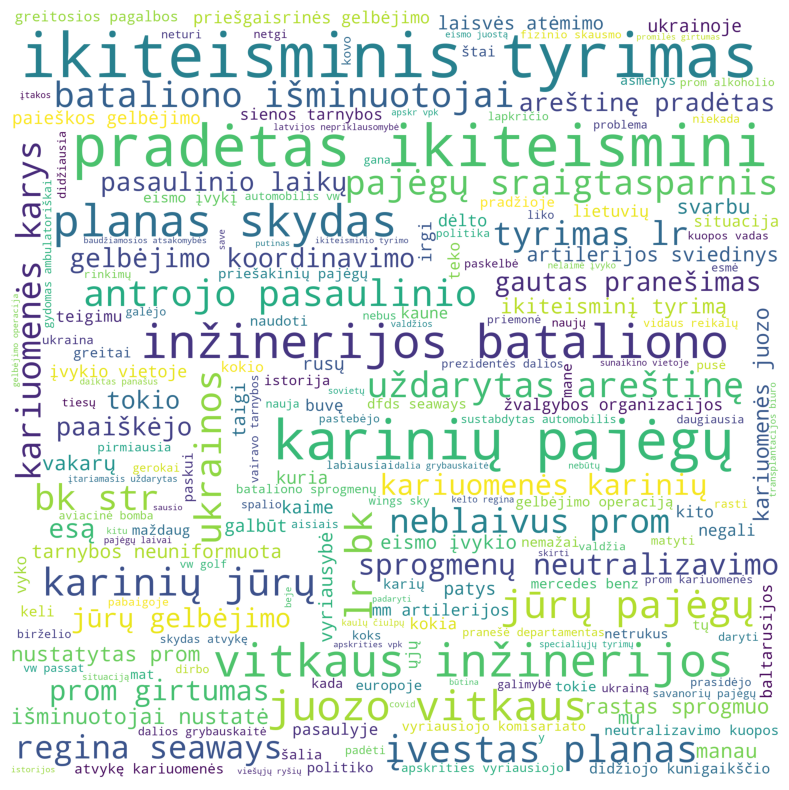

contribution related words:


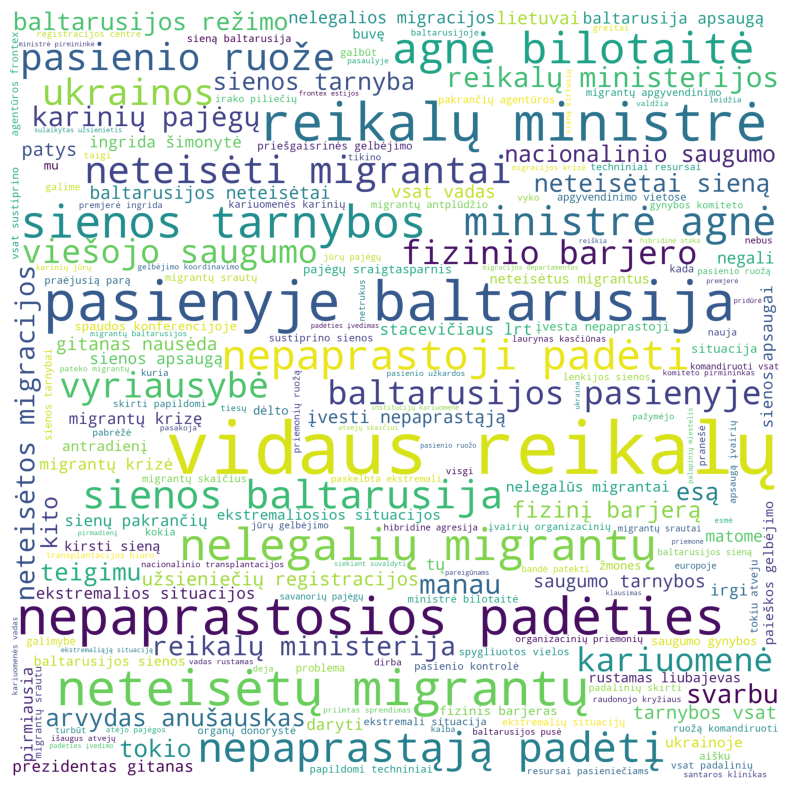

<IPython.core.display.Javascript object>

In [42]:
# nlp = spacy.load("lt_core_news_md")
# stop_words = STOP_WORDS

# Adding categories into separate dataframes
politics = full_df_copy[full_df_copy["keyword_id"] == 337490]
politics = politics["article_body"]

training = full_df_copy[full_df_copy["keyword_id"] == 337488]
training = training["article_body"]

budget = full_df_copy[full_df_copy["keyword_id"] == 337489]
budget = budget["article_body"]

cyber_security = full_df_copy[full_df_copy["keyword_id"] == 337491]
cyber_security = cyber_security["article_body"]

citizenship = full_df_copy[full_df_copy["keyword_id"] == 337492]
citizenship = citizenship["article_body"]

incidents = full_df_copy[full_df_copy["keyword_id"] == 337493]
incidents = incidents["article_body"]

contribution = full_df_copy[full_df_copy["keyword_id"] == 484549]
contribution = contribution["article_body"]

# Iterating through each new dataframe and creating wordcloud from while excluding custom stopwords
def wordcloud_draw(dataset, file_name):
    words = " ".join(dataset)
    cleaned_word = " ".join([word for word in words.split() if word not in stopwords])
    wordcloud = WordCloud(
        stopwords=stopwords, background_color="white", width=2500, height=2500
    ).generate(cleaned_word)
    plt.figure(1, figsize=(15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    # plt.figure(figsize=(15,10), facecolor=(.99, .99, .99))
    plt.savefig("Wordcloud_" + file_name + ".png")
    plt.show()


print("politics related words:")
wordcloud_draw(politics, "politics")

print("training related words:")
wordcloud_draw(training, "training")

print("budget related words:")
wordcloud_draw(budget, "budget")

print("cyber security related words:")
wordcloud_draw(cyber_security, "cyber_security")

print("citizenship related words:")
wordcloud_draw(citizenship, "citizenship")

print("incidents related words:")
wordcloud_draw(incidents, "incidents")

print("contribution related words:")
wordcloud_draw(contribution, "contribution")

In [43]:
full_df_copy["article_body"][1]

'lietuvoje su oficialiu vizitu lankėsi kroatijos respublikos kariuomenės vadas admirolas robert hranj  kuris susitikime su lietuvos kariuomenės vadu gen  ltn  valdemaru rupšiu aptarė dvišalį karinį bendradarbiavimą  bendrą dalyvavimą tarptautinėse pratybose bei planus dėl tolimesnės paramos ukrainai     su kroatijos ginkluotosiomis pajėgomis keičiamės patirtimi ir žiniomis skirtingų dimensijų  žemės ir oro pajėgumų vystyme  įsigyjamos technikos eksploatacijoje  tai tęsti planuojame ir ateityje     sakė lietuvos kariuomenės vadas  kroatijos respublikos kariuomenės vadas vizito metu susitiko su lietuvoje dislokuotos nato priešakinių pajėgų bataliono kovinės grupės vadu plk  ltn  lars neitzel  kroatijos kontingento lietuvoje vadu  taip pat susitiko su kovinėje grupėje tarnaujančiais kroatijos kariais  apžiūrėjo sąjungininkų ginkluotę  tai trečioji kroatijos pėstininkų kuopos rotacija nato priešakinių pajėgų kovinėje grupėje nuo jos įsteigimo lietuvoje 2017 metais  jai vadovauja ir didžiau

<IPython.core.display.Javascript object>

In [44]:
# Removing custom stop words from article_body
def remove_stopwords(text):
    words = word_tokenize(text)
    return " ".join([x for x in words if x not in stopwords])


full_df_copy["article_body"] = full_df_copy["article_body"].apply(remove_stopwords)
full_df_copy["article_body"][1]

'oficialiu vizitu lankėsi kroatijos respublikos kariuomenės vadas admirolas robert hranj susitikime kariuomenės vadu gen ltn valdemaru rupšiu aptarė dvišalį karinį bendradarbiavimą bendrą dalyvavimą tarptautinėse pratybose planus tolimesnės ukrainai kroatijos ginkluotosiomis pajėgomis keičiamės patirtimi žiniomis skirtingų dimensijų pajėgumų vystyme įsigyjamos technikos eksploatacijoje tęsti planuojame ateityje kariuomenės vadas kroatijos respublikos kariuomenės vadas vizito susitiko dislokuotos priešakinių pajėgų bataliono kovinės vadu plk ltn lars neitzel kroatijos kontingento vadu susitiko kovinėje grupėje tarnaujančiais kroatijos kariais apžiūrėjo sąjungininkų ginkluotę trečioji kroatijos pėstininkų kuopos rotacija priešakinių pajėgų kovinėje grupėje įsteigimo 2017 vadovauja didžiausią karių skaičių skiria vokietija batalioną karius personalą paskyrusios belgija čekija liuksemburgas nyderlandai norvegija kroatijos kariai sąjungininkai dalyvauja bendruose mokymuose tarptautinėse ope

<IPython.core.display.Javascript object>

In [45]:
# Reindex rows and add it to different dataframe
full_df_cleaned = full_df_copy.reset_index(drop=True)

<IPython.core.display.Javascript object>

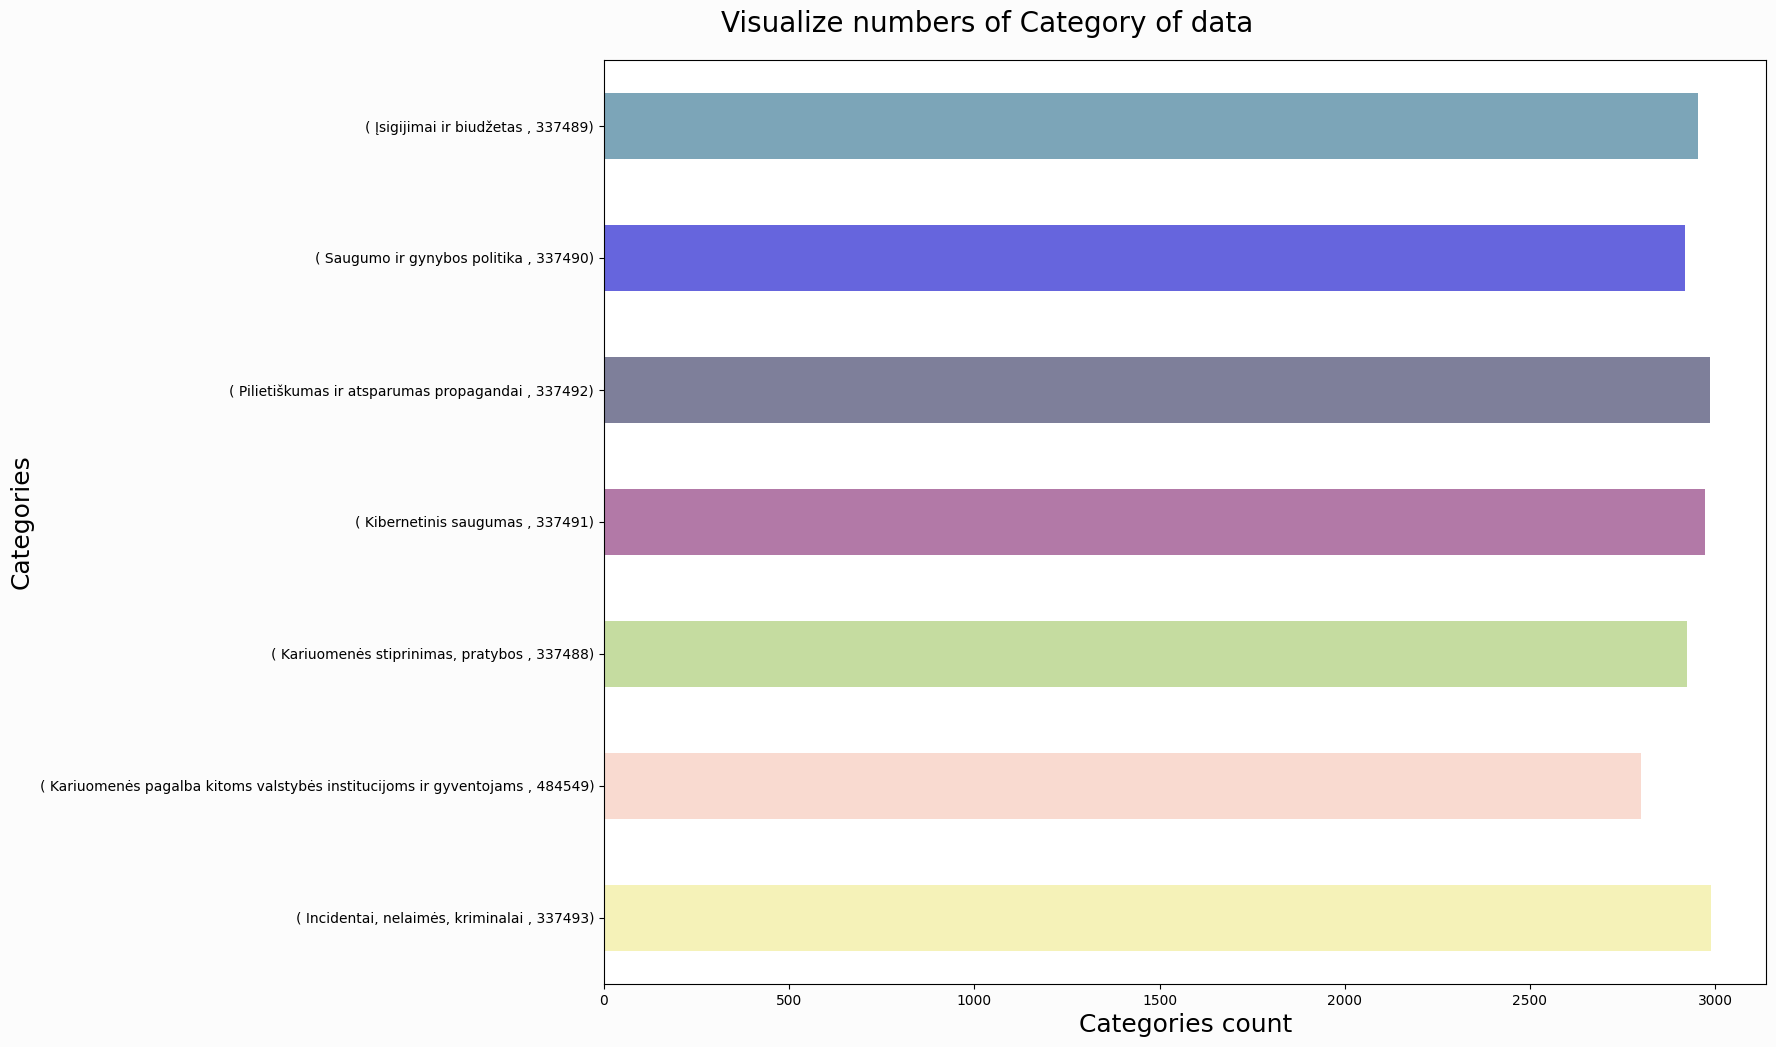

<IPython.core.display.Javascript object>

In [46]:
plt.figure(figsize=(15, 12), facecolor=(0.99, 0.99, 0.99))
full_df_cleaned.groupby("keyword_name").keyword_id.value_counts().plot(
    kind="barh", color=colors
)
plt.xlabel("Categories count", fontsize=18)
plt.ylabel("Categories", fontsize=18)
plt.title("Visualize numbers of Category of data", pad=20, fontsize=20).set_position(
    [0.33, 1]
)
plt.savefig("Cleaned_data.png", facecolor=(0.99, 0.99, 0.99))
plt.show()

## Vectorizing text with spaCy

In [ ]:
# USE FOR GOOGLE COLAB
# import locale
# locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!python3 -m spacy download lt_core_news_md


In [47]:
nlp = spacy.load("lt_core_news_md")

# Defining vectorizing function
def vector_text(text):
    doc = nlp(text)
    return doc.vector

<IPython.core.display.Javascript object>

In [48]:
# Vectorizing each article_body and adding it into one array. Takes up to 15min
buffer = []
for index, row in full_df_cleaned.iterrows():
    buffer.append(vector_text(row["article_body"]))

<IPython.core.display.Javascript object>

In [50]:
# Converting data to numpy array
buffer_2 = np.array(buffer)

<IPython.core.display.Javascript object>

### Defining data for training

In [51]:
# Define target and features
X = buffer_2
y = full_df_cleaned["keyword_id"]


# Train test split (66% train - 33% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=123
)


print("Training Data :", X_train.shape)

print("Testing Data : ", X_test.shape)

Training Data : (13763, 300)
Testing Data :  (6780, 300)


<IPython.core.display.Javascript object>

<h3>Logistic Regression</h3>

In [55]:
# Define Logistic Regression model
lr = LogisticRegression(max_iter=1000)

# Fiting training dataset
lr.fit(X_train, y_train)


# Do Logistic Regression prediction
lr_predictions = lr.predict(X_test)

lr_predictions

array([337490, 337493, 337489, ..., 484549, 337492, 484549], dtype=int64)

<IPython.core.display.Javascript object>

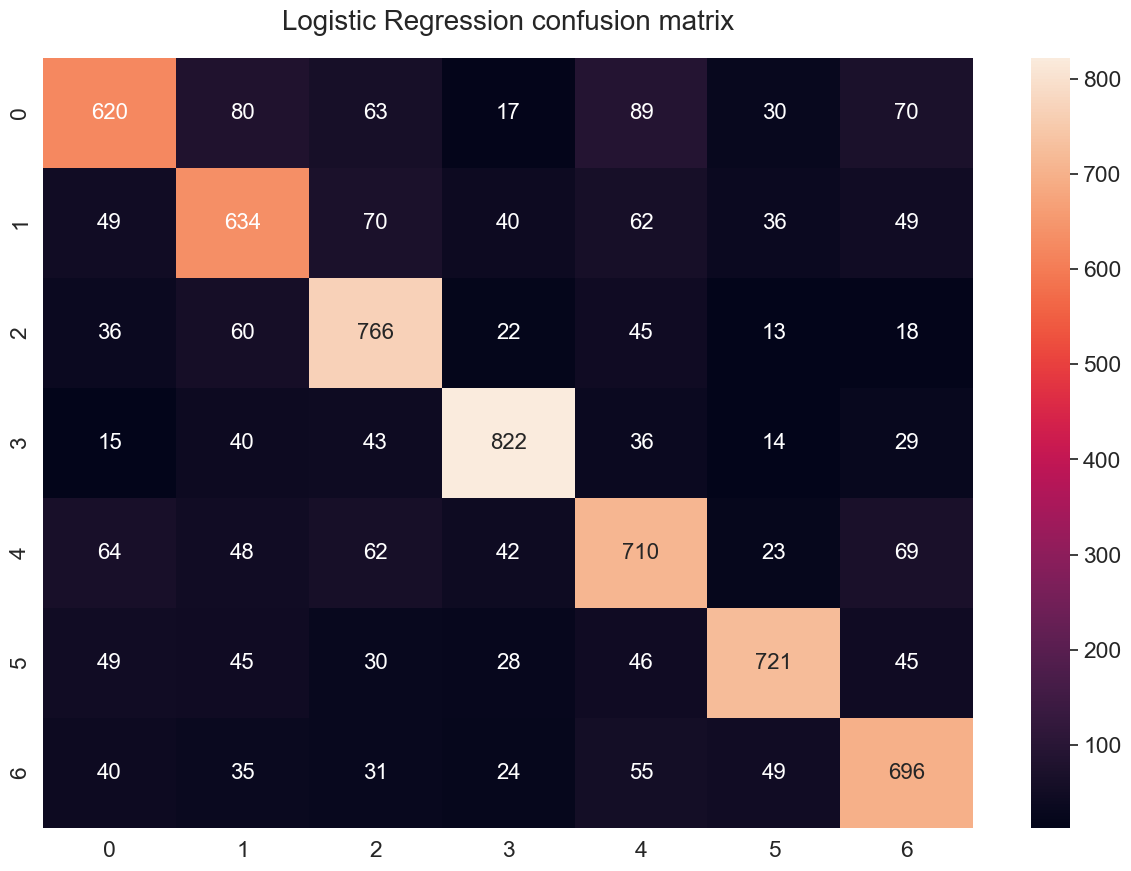

<IPython.core.display.Javascript object>

In [56]:
lr_df = pd.DataFrame(metrics.confusion_matrix(y_test, lr_predictions))
fig, ax = plt.subplots(figsize=(15, 10))

sn.set(font_scale=1.5)
sn.heatmap(lr_df, annot=True, annot_kws={"size": 16}, fmt="d", ax=ax)
plt.title("Logistic Regression confusion matrix", pad=20, fontsize=20)
plt.savefig("lr_prediction_heatmap.png")

plt.show()

In [57]:
# calculate accuracy
lr_accuracy = accuracy_score(y_test, lr_predictions)

# calculate precision
lr_precision = precision_score(y_test, lr_predictions, average="weighted")

# calculate recall
lr_recall = recall_score(y_test, lr_predictions, average="weighted")

# calculate F1 score
lr_f1 = f1_score(y_test, lr_predictions, average="weighted")

# print the results
print("Accuracy: {:.2f}%".format(lr_accuracy * 100))
print("Precision: {:.2f}%".format(lr_precision * 100))
print("Recall: {:.2f}%".format(lr_recall * 100))
print("F1 score: {:.2f}%".format(lr_f1 * 100))

# print Logistic Regression classification report
target_names = [
    category["keyword_name"].iloc[0],
    category["keyword_name"].iloc[1],
    category["keyword_name"].iloc[2],
    category["keyword_name"].iloc[3],
    category["keyword_name"].iloc[4],
    category["keyword_name"].iloc[5],
    category["keyword_name"].iloc[6],
]
print(classification_report(y_test, lr_predictions, target_names=target_names))

Accuracy: 73.29%
Precision: 73.41%
Recall: 73.29%
F1 score: 73.27%
                                                                     precision    recall  f1-score   support

                                 Kariuomenės stiprinimas, pratybos        0.71      0.64      0.67       969
                                           Įsigijimai ir biudžetas        0.67      0.67      0.67       940
                                       Saugumo ir gynybos politika        0.72      0.80      0.76       960
                                             Kibernetinis saugumas        0.83      0.82      0.82       999
                           Pilietiškumas ir atsparumas propagandai        0.68      0.70      0.69      1018
                                  Incidentai, nelaimės, kriminalai        0.81      0.75      0.78       964
 Kariuomenės pagalba kitoms valstybės institucijoms ir gyventojams        0.71      0.75      0.73       930

                                                           

<IPython.core.display.Javascript object>

<h3>Random Forest Classifier</h3>

In [58]:
# Define Random Forest Classifier model
rf = RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=42)


# Fiting training dataset
rf.fit(X_train, y_train)

# Do Random Forest Classifier prediction
rf_predictions = rf.predict(X_test)

rf_predictions

array([337490, 337492, 337489, ..., 484549, 337492, 484549], dtype=int64)

<IPython.core.display.Javascript object>

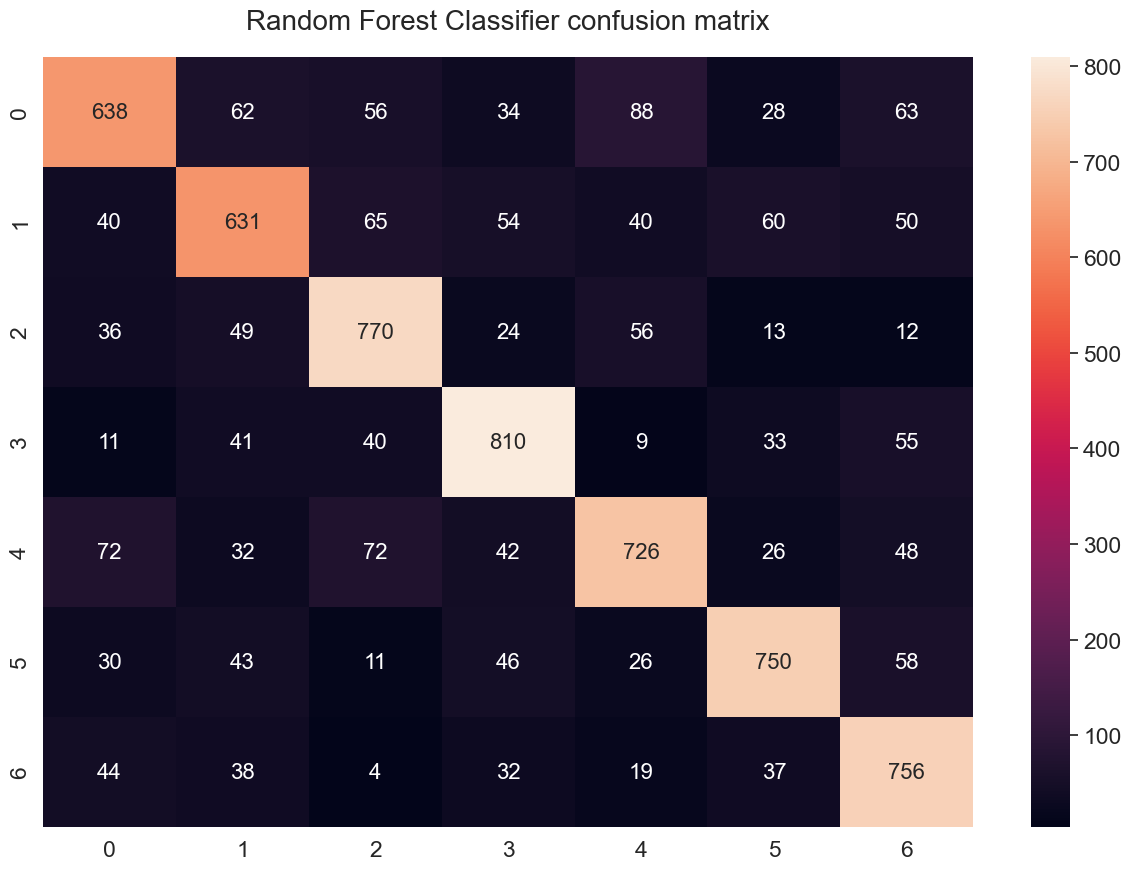

<IPython.core.display.Javascript object>

In [59]:
rf_df = pd.DataFrame(metrics.confusion_matrix(y_test, rf_predictions))
fig, ax = plt.subplots(figsize=(15, 10))

sn.set(font_scale=1.5)
sn.heatmap(rf_df, annot=True, annot_kws={"size": 16}, fmt="d", ax=ax)
plt.title("Random Forest Classifier confusion matrix", pad=20, fontsize=20)
plt.savefig("rf_prediction_heatmap.png")
plt.show()

In [ ]:
# calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)

# calculate precision
rf_precision = precision_score(y_test, rf_predictions, average="weighted")

# calculate recall
rf_recall = recall_score(y_test, rf_predictions, average="weighted")

# calculate F1 score
rf_f1 = f1_score(y_test, rf_predictions, average="weighted")

# print the results
print("Accuracy: {:.2f}%".format(rf_accuracy * 100))
print("Precision: {:.2f}%".format(rf_precision * 100))
print("Recall: {:.2f}%".format(rf_recall * 100))
print("F1 score: {:.2f}%".format(rf_f1 * 100))

# print Random Forest classification report
target_names = [
    category['keyword_name'].iloc[0],
    category['keyword_name'].iloc[1],
    category['keyword_name'].iloc[2],
    category['keyword_name'].iloc[3],
    category['keyword_name'].iloc[4],
    category['keyword_name'].iloc[5],
    category['keyword_name'].iloc[6],
]
print(classification_report(y_test, rf_predictions, target_names=target_names))

<h3>Decision Tree Classifier</h3>

In [52]:
# Define Decision Tree Classifier model
dt = DecisionTreeClassifier()

# Fiting training dataset
dt.fit(X_train, y_train)


# Do Decision Tree Classifier prediction
dt_predictions = dt.predict(X_test)

dt_predictions

array([337488, 337493, 337489, ..., 484549, 337492, 484549], dtype=int64)

<IPython.core.display.Javascript object>

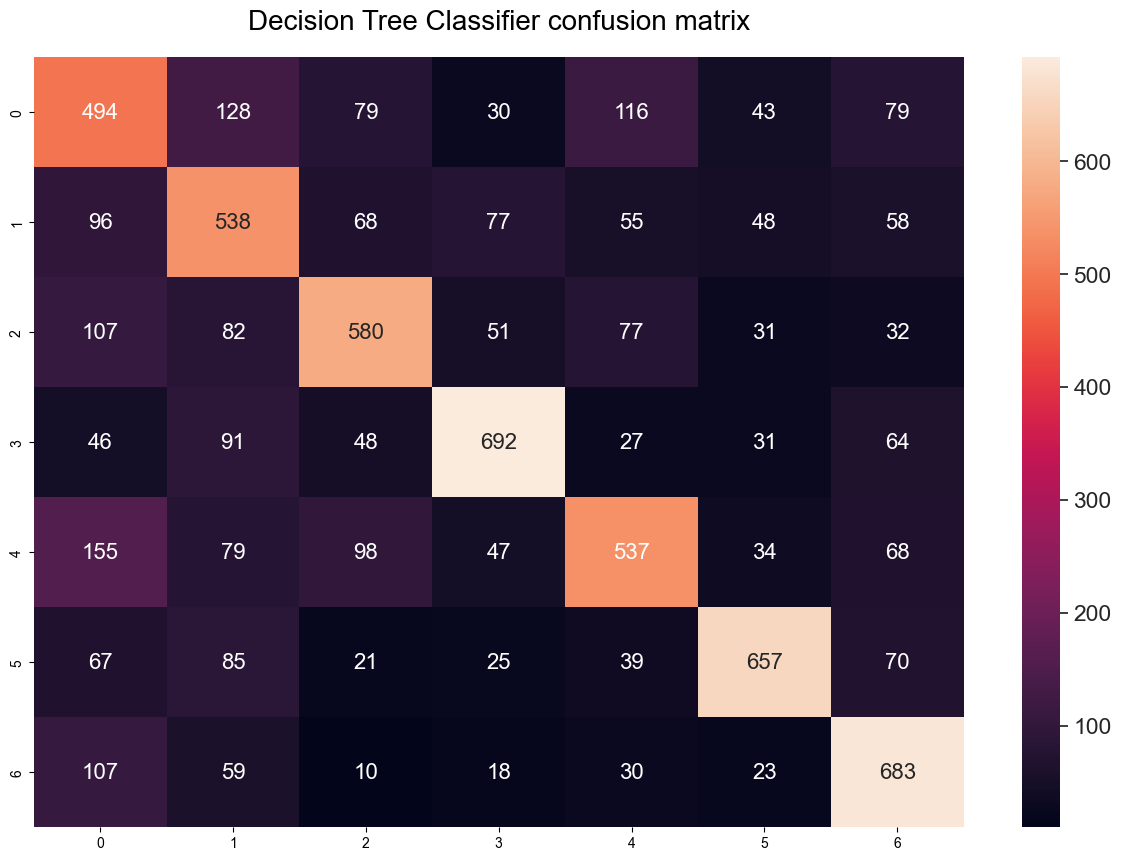

<IPython.core.display.Javascript object>

In [53]:
dt_df = pd.DataFrame(metrics.confusion_matrix(y_test, dt_predictions))
fig, ax = plt.subplots(figsize=(15, 10))

sn.set(font_scale=1.5)
sn.heatmap(dt_df, annot=True, annot_kws={"size": 16}, fmt="d", ax=ax)
plt.title("Decision Tree Classifier confusion matrix", pad=20, fontsize=20)
plt.savefig("dt_prediction_heatmap.png")
plt.show()

In [54]:
# calculate accuracy
dt_accuracy = accuracy_score(y_test, dt_predictions)

# calculate precision
dt_precision = precision_score(y_test, dt_predictions, average="weighted")

# calculate recall
dt_recall = recall_score(y_test, dt_predictions, average="weighted")

# calculate F1 score
dt_f1 = f1_score(y_test, dt_predictions, average="weighted")

# print the results
print("Accuracy: {:.2f}%".format(dt_accuracy * 100))
print("Precision: {:.2f}%".format(dt_precision * 100))
print("Recall: {:.2f}%".format(dt_recall * 100))
print("F1 score: {:.2f}%".format(dt_f1 * 100))

# print Decision Tree classification report
target_names = [
    category["keyword_name"].iloc[0],
    category["keyword_name"].iloc[1],
    category["keyword_name"].iloc[2],
    category["keyword_name"].iloc[3],
    category["keyword_name"].iloc[4],
    category["keyword_name"].iloc[5],
    category["keyword_name"].iloc[6],
]
print(classification_report(y_test, dt_predictions, target_names=target_names))

Accuracy: 61.67%
Precision: 62.36%
Recall: 61.67%
F1 score: 61.84%
                                                                     precision    recall  f1-score   support

                                 Kariuomenės stiprinimas, pratybos        0.46      0.51      0.48       969
                                           Įsigijimai ir biudžetas        0.51      0.57      0.54       940
                                       Saugumo ir gynybos politika        0.64      0.60      0.62       960
                                             Kibernetinis saugumas        0.74      0.69      0.71       999
                           Pilietiškumas ir atsparumas propagandai        0.61      0.53      0.57      1018
                                  Incidentai, nelaimės, kriminalai        0.76      0.68      0.72       964
 Kariuomenės pagalba kitoms valstybės institucijoms ir gyventojams        0.65      0.73      0.69       930

                                                           

<IPython.core.display.Javascript object>

## Saving the best model to pickle

In [ ]:
import pickle

In [ ]:
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf, file)

## Test on prediction data


In [61]:
sample_df = pd.read_csv("data/KAM_tema_predict_2.csv", index_col=0, encoding="utf-8")

<IPython.core.display.Javascript object>

In [62]:
sample_df["article_title"] = sample_df["article_title"].str.lower()
sample_df["article_body"] = sample_df["article_body"].str.lower()

<IPython.core.display.Javascript object>

In [63]:
sample_df["article_body"] = sample_df["article_body"].apply(
    lambda x: remove_html_tags(x)
)

<IPython.core.display.Javascript object>

In [64]:
sample_df["article_body"] = sample_df["article_body"].apply(special_char)

<IPython.core.display.Javascript object>

In [65]:
sample_df["title_lang"] = sample_df["article_title"].apply(detect_lang)
sample_df["body_lang"] = (
    sample_df["article_body"].str.slice(stop=255).apply(detect_lang)
)

<IPython.core.display.Javascript object>

In [66]:
clean_dataframe(sample_df)
sample_df.drop(["title_lang", "body_lang"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [67]:
sample_df["article_body"] = sample_df["article_body"].apply(remove_stopwords)

<IPython.core.display.Javascript object>

In [68]:
sample_df_cleaned = sample_df

<IPython.core.display.Javascript object>

In [69]:
sample_df_cleaned

keyword_id                           keyword_name  \
article_id                                                      
49448907        337489  KAM tema: Įsigijimai ir biudžetas [i]   
49426217        337489  KAM tema: Įsigijimai ir biudžetas [i]   
49425404        337489  KAM tema: Įsigijimai ir biudžetas [i]   
49425431        337489  KAM tema: Įsigijimai ir biudžetas [i]   
49426859        337489  KAM tema: Įsigijimai ir biudžetas [i]   

                                                                                                                   article_title  \
article_id                                                                                                                         
49448907                                                                 popiežius ragina sustabdyti migrantų „mirties keliones“   
49426217                                                finansų viceministras: solidarumo mokestis bankų saugumui įtakos neturės   
49425404                                                            arvydas anušauskas remia idėją dėl bankų solidarumo mokesčio   
49425431    šimkus: solidarumo įnašo tam tikriems bankams gali ir nebūti, jeigu jie solidariai išaugintų indėlių palūkanų normas   
49426859                                                          lenkų šmeižimo kampanija ir skandalingi balsų vagystės atvejai   

                                                                                                                                                                                                                                                              article_body  \
article_id                                                                                                                                                                                                                                                                   
49448907    pietų italijos krantų nuskendo laivas žuvo mažiausiai popiežius pranciškus paragino nutraukti mirtinai pavojingą prekybą migrantaissudužo audrą tegul prekiautojai įmonėmis sustabdyti nebegalėtų disponuoti daugybės nekaltą gyvybėmis baigdamas viešpatie...   
49426217    finansų viceministras gediminas norkūnas planuojamas laikinas solidarumo mokestis bankams tikėtina uždirbsiantiems mlrd bendro pelno saugumui įtakos neturės trys reitingų agentūros įvertinusios įnašas papildomas reikalavimas tiems bankams nepaveiks sa...   
49425404    konservatorius arvydas anušauskas palaikantis idėją įvesti bankų solidarumo mokestį surinktos lėšos panaudojamos karinio mobilumo projektams naudą pajustų pinigus tvarkoma viešoji infrastruktūra kuria naudojasi kariuomenė karinis mobilumas tiltai viad...   
49425431    banko lb valdybos pirmininkas gediminas šimkus tvirtina bankų solidarumo įnašas skirtas neįprastai pelno daliai bankai solidariai išaugintų indėlių palūkanų normas įnašo solidarumo įnašo konstrukcijoje kalbama neįprastinę netipinę pelno dalį bankai so...   
49426859    pirmadienį kovo sužinojome mero rinkimų rezultatus nepatvirtintus lenkų rinkimų akcijos krikščioniškų šeimų kandidatą waldemarą uibaną balsavo 49 43 rinkėjų lenkai sudaro 42 socialdemokratą robertą duchnevičių 57 teisę balsuoti kandidatus atiduotų bal...   

                    pubdatetime  
article_id                       
49448907    2023-03-24 00:00:00  
49426217    2023-03-23 10:59:00  
49425404    2023-03-23 10:22:48  
49425431    2023-03-23 10:16:00  
49426859    2023-03-23 00:00:00

<IPython.core.display.Javascript object>

In [70]:
buffer_sample = []
for index, row in sample_df_cleaned.iterrows():
    buffer_sample.append(vector_text(row["article_body"]))

<IPython.core.display.Javascript object>

In [71]:
buffer_sample_2 = np.array(buffer_sample)

<IPython.core.display.Javascript object>

In [72]:
samplepredict = rf.predict(buffer_sample_2)

<IPython.core.display.Javascript object>

In [73]:
prediction_df = pd.DataFrame(samplepredict)

<IPython.core.display.Javascript object>

In [74]:
prediction_df

0
0  484549
1  337489
2  337489
3  337489
4  337490

<IPython.core.display.Javascript object>